In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Load data
df = pd.read_csv('data_set/train.csv')
df_copy = df.copy()

# Data Cleaning and Preprocessing for Categorical Data

In [3]:
# inclure les colonnes de type object sauf la colonne 'Loan_ID'
df_cat = df.select_dtypes(include=['object']).drop('Loan_ID', axis=1)

In [4]:
# remplacer les valeurs manquantes par la valeur la plus fréquente
for col in df_cat.columns:
    df_cat[col] = df_cat[col].fillna(df_cat[col].mode()[0])
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [5]:
# Data Preprocessing
numeric = df.select_dtypes(include=['int64', 'float64']).columns
for value in numeric:
    df[value] =df[value].fillna(df[value].median())

df_num = df[numeric]

In [6]:
df_cat['Dependents'] = df_cat['Dependents'].replace('3+', 3).astype(int)

# replace the categorical values with the numerical values
df_cat['Gender'] = np.where(df_cat['Gender'] == 'Male', 0, 1)
df_cat['Married'] = np.where(df_cat['Married'] == 'Yes', 1, 0)
df_cat['Education'] = np.where(df_cat['Education'] == 'Graduate', 1, 0)
df_cat['Self_Employed'] = np.where(df_cat['Self_Employed'] == 'Yes', 1, 0)
df_cat['Property_Area'] = np.select([df_cat['Property_Area'] == 'Urban', 
                                     df_cat['Property_Area'] == 'Rural'], 
                                    [0, 1], default=2)
df_cat['Loan_Status'] = np.where(df_cat['Loan_Status'] == 'Y', 1, 0)

In [7]:
# Concatenate the two dataframes
df_concat = pd.concat([df_cat, df_num], axis=1)
df_concat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,0,1,0,0,1,5849,0.0,128.0,360.0,1.0
1,0,1,1,1,0,1,0,4583,1508.0,128.0,360.0,1.0
2,0,1,0,1,1,0,1,3000,0.0,66.0,360.0,1.0
3,0,1,0,0,0,0,1,2583,2358.0,120.0,360.0,1.0
4,0,0,0,1,0,0,1,6000,0.0,141.0,360.0,1.0


In [8]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   Property_Area      614 non-null    int32  
 6   Loan_Status        614 non-null    int32  
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


# Split de nos variables et entrainement

In [9]:
# Split the data
X = df_concat.drop(columns=['Loan_Status', 'Loan_Amount_Term', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)
y = df_concat['Loan_Status']

In [10]:
X

,Gender,Married,Dependents,Education,Property_Area,Credit_History
0,0,0,0,1,0,1.0
1,0,1,1,1,1,1.0
2,0,1,0,1,0,1.0
3,0,1,0,0,0,1.0
4,0,0,0,1,0,1.0
...,...,...,...,...,...,...
609,1,0,0,1,1,1.0
610,0,1,3,1,1,1.0
611,0,1,1,1,0,1.0
612,0,1,2,1,0,1.0


# Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Evaluation du model

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Prediction du model

In [13]:
predict = model.predict(X_test)

# Matrix de correlation

<Axes: >

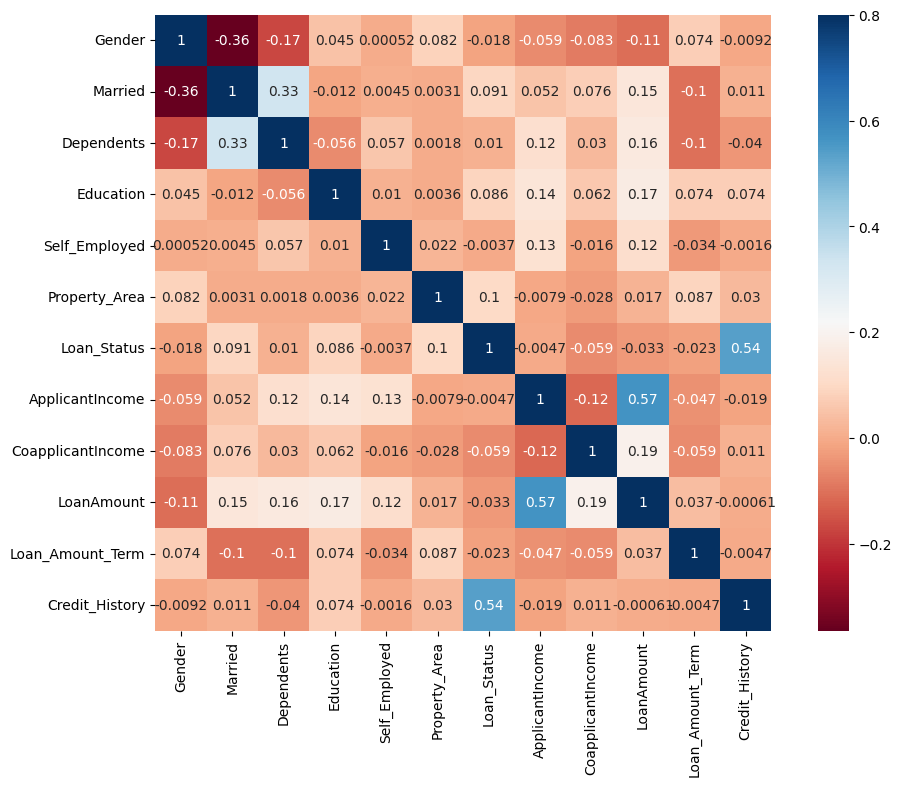

In [14]:
matrix = df_concat.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(matrix, vmax=.8, square=True, cmap='RdBu', annot=True)

# Test score model

In [15]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8065173116089613, 0.8211382113821138)